# Fake News Exploratory Data Analysis

Get subset of FakeNewCorpus data set.

In [1]:
import pandas as pd
import regex as re
from cleantext import clean
raw_data = pd.read_csv('https://raw.githubusercontent.com/several27/FakeNewsCorpus/master/news_sample.csv',index_col=0)
raw_data.head()

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary
0,141,awm.com,unreliable,http://awm.com/church-congregation-brings-gift...,Sometimes the power of Christmas will make you...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Church Congregation Brings Gift to Waitresses ...,Ruth Harris,NaN,[''],NaN,NaN,NaN
1,256,beforeitsnews.com,fake,http://beforeitsnews.com/awakening-start-here/...,AWAKENING OF 12 STRANDS of DNA – “Reconnecting...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,AWAKENING OF 12 STRANDS of DNA – “Reconnecting...,Zurich Times,NaN,[''],NaN,NaN,NaN
2,700,cnnnext.com,unreliable,http://www.cnnnext.com/video/18526/never-hike-...,Never Hike Alone: A Friday the 13th Fan Film U...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Never Hike Alone - A Friday the 13th Fan Film ...,NaN,NaN,[''],Never Hike Alone: A Friday the 13th Fan Film ...,NaN,NaN
3,768,awm.com,unreliable,http://awm.com/elusive-alien-of-the-sea-caught...,"When a rare shark was caught, scientists were ...",2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Elusive ‘Alien Of The Sea ‘ Caught By Scientis...,Alexander Smith,NaN,[''],NaN,NaN,NaN
4,791,bipartisanreport.com,clickbait,http://bipartisanreport.com/2018/01/21/trumps-...,Donald Trump has the unnerving ability to abil...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Trump’s Genius Poll Is Complete & The Results ...,Gloria Christie,NaN,[''],NaN,NaN,NaN


Perform basic cleaning: remove urls, dates, numbers, emails.

In [2]:
data = raw_data.copy(deep = True)

In [3]:
pattern = re.compile(r"([\d]{1,2}[\/|\-][\d]{1,2}(?:[\/|\-][\d]{2,4})?|[\d]{2,4}[\/|\-][\d]{1,2}[\/|\-][\d]{1,2}|(?:january|february|march|april|may|june|july|august|september|october|november|december)[\s][\d]{1,2}[a-z][a-z](?:\s[\d]{2,4})|[\d][\d]\w?\w?\sof\s(?:january|february|march|april|may|june|july|august|september|october|november|december)(?:\s[\d]{2,4})?|(?:january|february|march|april|may|june|july|august|september|october|november|december)\s\d\d?\w?\w?,?(?:\s\d{2,4})?)")
def clean_string(s):
    s1 = pattern.sub("date", s.lower())
    s2 = clean(s1, lower=True,
                no_line_breaks=True,
                no_emails=True,
                no_urls=True,
                no_numbers=True,
                lang="en",
                replace_with_number="num",
                replace_with_email="email",
                replace_with_url="url")
    return s2
def clean_dataframe(dataframe):
    data['content'] = data['content'].apply(clean_string)

In [4]:
clean_dataframe(data)
data['content'].head()

0    sometimes the power of christmas will make you...
1    awakening of num strands of dna - "reconnectin...
2    never hike alone: a friday the 13th fan film u...
3    when a rare shark was caught, scientists were ...
4    donald trump has the unnerving ability to abil...
Name: content, dtype: object

Tokenize the text
Remove stopwords and compute reduction of vocabulary rate after having removed them
Stem words and compute reduction rate of vocabulary

In [5]:
import nltk
import itertools
from nltk.corpus import stopwords
from nltk.stem.porter import *
def preprocess(dataframe):
    # tokenize content column
    dataframe['content'] = dataframe['content'].apply(nltk.word_tokenize)
    print("Tokenizing...")
    tokens = list(itertools.chain.from_iterable(dataframe['content']))
    vocabulary = set(tokens)
    # remove stopwords
    d = stopwords.words('english')
    print("Removing stopwords...")
    dataframe['content'] = [[token for token in token_list if token not in d] for token_list in dataframe['content']]
    tokens_no_stopwords = list(itertools.chain.from_iterable(dataframe['content']))
    vocabulary_no_stopwords = set(tokens)
    print("Reduction rate of removing stopwords: " + str(1 - len(vocabulary_no_stopwords) / len(vocabulary)))
    # stem tokens
    stemmer = PorterStemmer()
    print("Stemming...")
    dataframe['content'] = [[stemmer.stem(token) for token in token_list if token not in d] for token_list in dataframe['content']]
    tokens_stem = list(itertools.chain.from_iterable(dataframe['content']))
    vocabulary_stem = set(tokens_stem)
    print("Reduction rate of stemming: " + str(1 - len(vocabulary_stem)/len(vocabulary_no_stopwords)))
    

In [6]:
preprocess(data)
data['content']

Tokenizing...
Removing stopwords...
Reduction rate of removing stopwords: 0.0
Stemming...
Reduction rate of stemming: 0.3214631782945736


0      [sometim, power, christma, make, wild, wonder,...
1      [awaken, num, strand, dna, -, ``, reconnect, '...
2      [never, hike, alon, :, friday, 13th, fan, film...
3      [rare, shark, caught, ,, scientist, left, blun...
4      [donald, trump, unnerv, abil, abil, creat, rea...
                             ...                        
245    [prison, rahm, ,, god, 's, work, mani, other, ...
246    [num, use, item, tini, home, headlin, :, bitco...
247    [former, cia, director, michael, hayden, said,...
248    [antonio, sabato, jr., say, hollywood, 's, lib...
249    [former, u.s., presid, bill, clinton, monday, ...
Name: content, Length: 250, dtype: object

Next, we define functions that can visualize our dataset

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def pair_keyword_type(keyword): 
    dataarray = []
    for i in range(0,data.__len__()): 
        instances = data.content[i].count(str(keyword))
        dataarray.append((instances,data.type[i]))
    return dataarray

In [9]:
def scatterplot_keyword_type(keyword):
    pair_keyword_list = pair_keyword_type(keyword)
    tuple_array = pair_keyword_type(keyword)
    typearray = []
    countarray = []
    for i in range(0,pair_keyword_list.__len__()): 
        typearray.append(str(tuple_array[i][1]))
        countarray.append(tuple_array[i][0])
    fig = plt.figure()
    ax =fig.add_axes([0,0,2,1])
    ax.scatter(typearray,countarray)
    ax.set_title("data for keyword '"+ keyword + "'")
    plt.xticks(rotation = 'vertical')
    plt.show()

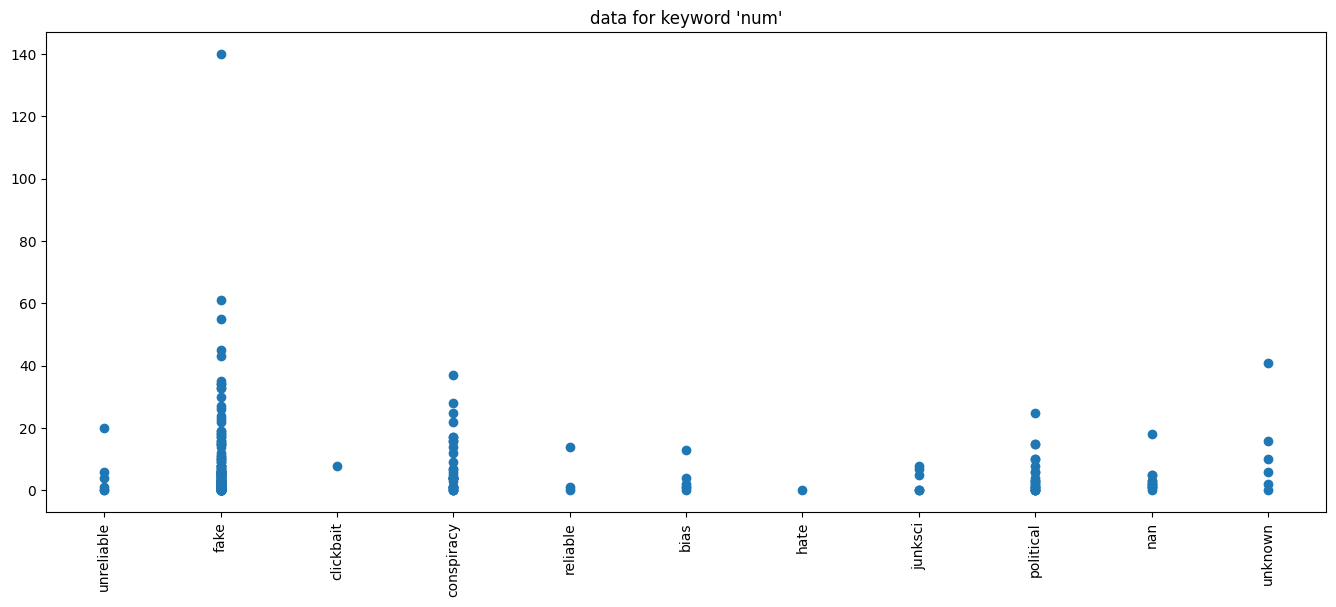

In [10]:
scatterplot_keyword_type('num')

In [11]:
def boxplot_keyword_type(keyword):
    tuple_array=pair_keyword_type(keyword) 
    boxdata=[]
    dict = {}
    for i in range(0,len(tuple_array)):
        if tuple_array[i][1] not in dict:
            dict[tuple_array[i][1]] = [tuple_array[i][0]]
        else:
            dict[tuple_array[i][1]].append(tuple_array[i][0])
    for i in dict:
        boxdata.append(dict[i])
    fig = plt.figure()
    ax =fig.add_axes([0,0,2,1])
    ax.boxplot(boxdata, labels = list(dict.keys()))
    ax.set_title("data for keyword '"+ keyword + "'")
    plt.xticks(rotation = 'vertical')
    plt.show()

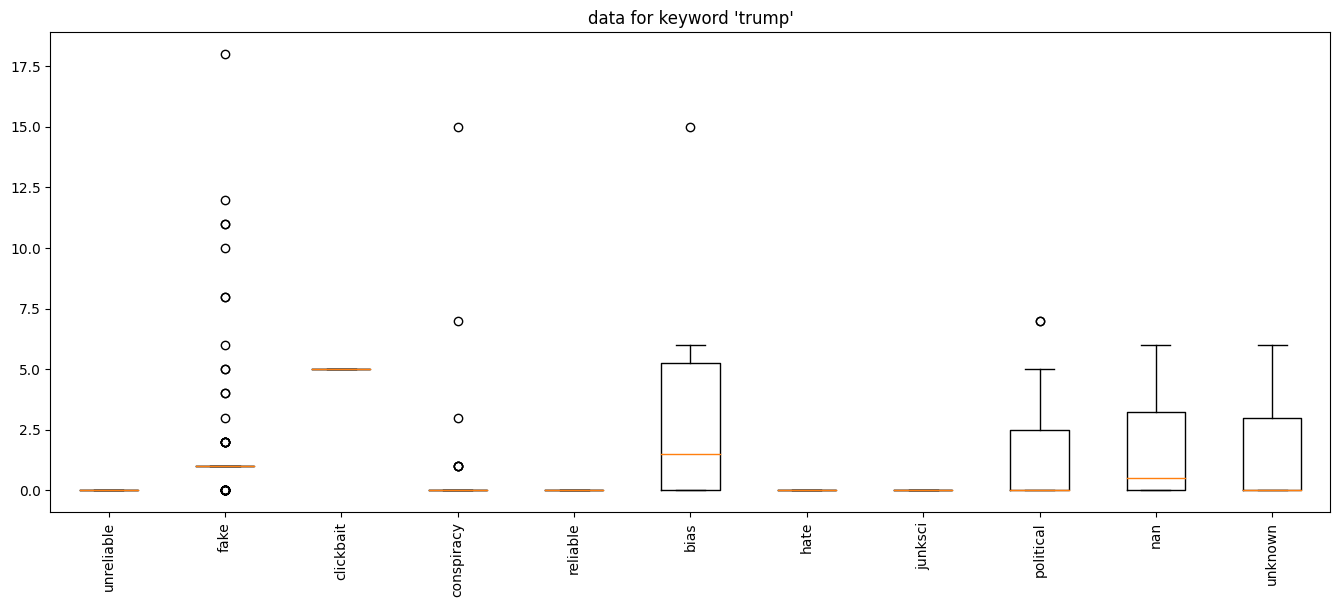

In [12]:
boxplot_keyword_type('trump')

In [13]:
def barplot_keyword_type(keyword): 
    tuple_array = pair_keyword_type(keyword)
    rawdict = {}
    for i in range(0,len(tuple_array)):
        if tuple_array[i][1] not in rawdict:
            rawdict[tuple_array[i][1]] = [tuple_array[i][0]]
        else:
            rawdict[tuple_array[i][1]].append(tuple_array[i][0])

    meandict={}
    for i in rawdict: 
        meandict[i] = np.mean(rawdict[i])
    mediandict={}
    for i in rawdict: 
        mediandict[i] = np.median(rawdict[i])
    meanvals =[]
    medianvals=[]
    for i in mediandict:
        medianvals.append(mediandict[i])
    for i in meandict:
        meanvals.append(meandict[i])
    types = list(mediandict.keys())
    types = [str(i) for i in types]
    print(medianvals)
    print(meanvals)
    print(types)
    df = pd.DataFrame({
    'types': types,
    'meanvals': meanvals,
    'medianvals': medianvals
    })
    
    df.plot(x="types", y=["meanvals", "medianvals"], kind="bar", figsize=(10,5), title= "data for keyword '"+ keyword + "'")
    

[13.5, 19.0, 16.0, 31.0, 18.0, 15.5, 1.0, 11.0, 20.0, 11.5, 48.0]
[14.166666666666666, 28.81935483870968, 16.0, 33.806451612903224, 19.666666666666668, 16.0, 1.0, 13.833333333333334, 30.869565217391305, 17.833333333333332, 120.83333333333333]
['unreliable', 'fake', 'clickbait', 'conspiracy', 'reliable', 'bias', 'hate', 'junksci', 'political', 'nan', 'unknown']


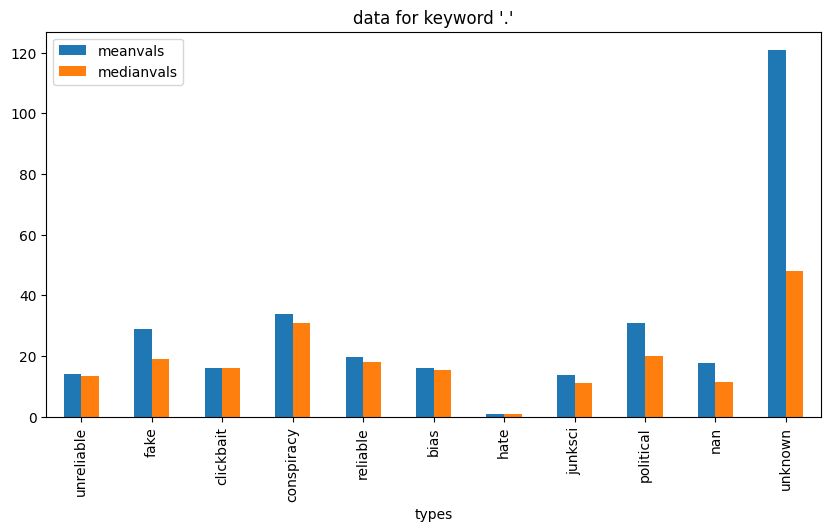

In [14]:
barplot_keyword_type(".") 

After exploring this data, some things we could expect, appear as true; fake and clickbait articles are more prone to using "!", and conspiracy articles were prone to using "?", for example. However, some surprises also arose. The 'unknown' type contain texts prone to using "." and "?".

In [15]:
def articles_of_type(keyword):

    unknown_articles_index =0
    for i in range (0,data.__len__()):
        if (raw_data.type[i] == keyword) :
            unknown_articles_index +=1
            print(i)
            print(raw_data.content[i])
    print(unknown_articles_index)
    

After manually inspecting the unknown category, it seems as if it contains a mixture of reliable articles, some conspiratorial articles, and some that read as self-help, junk science. These are why we see high averages of "?" and ".", and the question of how to treat this category is raised. 

In [16]:
def most_frequent_words_processed_data(num): 
    worddict = {}
    for i in range(0,data.__len__()): 
        words = data.content[i]
        
        for i in words: 
            if i in worddict:
                worddict[str(i)] +=1 
            else: 
                worddict[str(i)] = 1
    sorted_dict = dict(sorted(worddict.items(), key = lambda item: -item[1]))
    return dict(list(sorted_dict.items())[:num])

most_frequent_words_processed_data(10000)



{',': 8575,
 '.': 7504,
 'num': 1807,
 "'s": 1569,
 '``': 1185,
 "''": 1126,
 ':': 1083,
 ')': 713,
 '(': 711,
 '?': 492,
 'one': 466,
 '!': 451,
 '-': 448,
 "n't": 430,
 'like': 407,
 'time': 394,
 'peopl': 389,
 'state': 368,
 'trump': 350,
 'would': 332,
 'use': 322,
 'market': 297,
 'us': 284,
 'year': 283,
 'also': 276,
 'new': 270,
 '--': 267,
 ';': 265,
 'blockchain': 260,
 'make': 258,
 'url': 243,
 'thing': 235,
 'think': 234,
 'said': 232,
 'go': 232,
 'way': 228,
 'report': 227,
 'mani': 226,
 'date': 226,
 'govern': 226,
 'even': 217,
 'could': 214,
 'nation': 213,
 '...': 213,
 'take': 212,
 'next': 212,
 "'": 211,
 'get': 210,
 '&': 206,
 'see': 203,
 'presid': 202,
 'say': 192,
 'work': 191,
 'stock': 188,
 'american': 186,
 'two': 185,
 'world': 185,
 'need': 183,
 'first': 181,
 'right': 180,
 'day': 177,
 'life': 177,
 '$': 176,
 'power': 171,
 'want': 169,
 '%': 166,
 'may': 166,
 'look': 163,
 'u.s.': 162,
 'help': 157,
 'countri': 155,
 'come': 155,
 'includ': 153,

In [17]:
def most_frequent_words_raw_data(num):
    worddict = {}
    for i in range(0,raw_data.__len__()): 
        words = raw_data.content[i].split()
        for i in words: 
            if i in worddict:
                worddict[str(i)] +=1 
            else: 
                worddict[str(i)] = 1
    sorted_dict = dict(sorted(worddict.items(), key = lambda item: -item[1]))
    return dict(list(sorted_dict.items())[:num])

print(most_frequent_words_raw_data(10000))

{'the': 8244, 'of': 4826, 'to': 4722, 'and': 4414, 'a': 3141, 'in': 2740, 'is': 2193, 'that': 2014, 'for': 1402, 'with': 1059, 'on': 1055, 'are': 1049, 'The': 1044, 'as': 960, 'it': 914, 'you': 898, 'be': 877, 'I': 804, 'this': 788, 'by': 767, 'was': 765, 'have': 762, 'not': 678, 'from': 668, 'or': 644, 'at': 610, 'has': 534, 'your': 524, 'an': 502, 'their': 488, 'they': 483, 'will': 469, 'about': 420, 'can': 419, 'we': 412, 'more': 406, 'but': 391, 'who': 383, 'all': 383, '–': 362, 'which': 361, 'were': 353, 'been': 342, 'his': 328, 'our': 327, 'one': 327, 'what': 316, 'he': 311, 'would': 311, 'its': 291, 'like': 287, 'people': 286, 'In': 285, 'if': 281, 'This': 274, 'do': 265, 'It': 265, 'these': 260, 'Blockchain': 260, 'had': 255, 'some': 251, 'into': 249, 'also': 247, 'no': 246, 'so': 241, 'when': 237, 'any': 229, 'out': 227, 'there': 226, 'other': 225, 'just': 219, 'than': 219, 'my': 215, 'up': 209, 'only': 203, 'And': 202, '&': 200, 'could': 191, 'many': 187, 'being': 187, 'even'

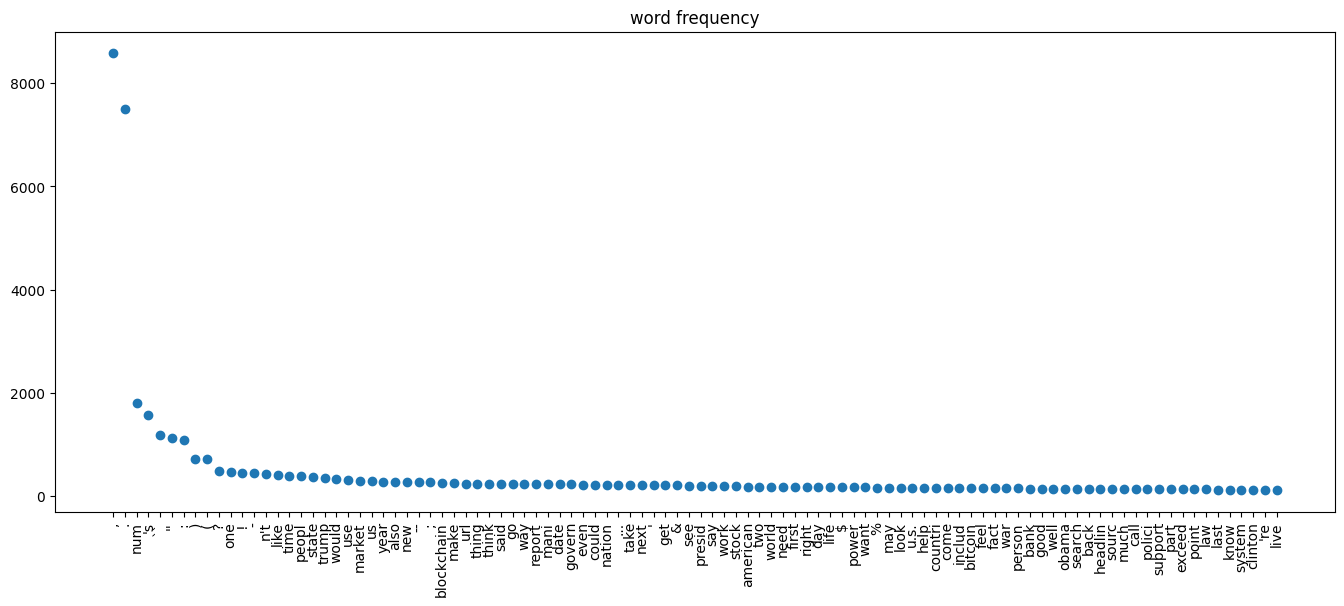

In [18]:
def plot_most_frequent_words(dict): 
    wordarray = list(dict.keys())
    valuearray = list(dict.values())
    fig = plt.figure()
    ax =fig.add_axes([0,0,2,1])
    ax.scatter(wordarray,valuearray)
    ax.set_title("word frequency")
    plt.xticks(rotation = 'vertical')
    plt.show()
    
plot_most_frequent_words(most_frequent_words_processed_data(100))

In [21]:
import pyarrow.feather as feather 

featherdata = feather.read_feather("sample_feather_STRUCTURED")

#importerer Mikkels forkortede version af datasættet

In [50]:
featherdata['type']
len(featherdata)
#Den har lige under en million entries

929381

In [47]:

#jeg laver et dictionairy som tæller antallet af artikler under hvert label i absolutte tal
typedict = {}
for i in featherdata['type']: 
    if str(i) in typedict:
        typedict[str(i)] +=1 
    else: 
        typedict[str(i)] =1 
typedict
typedictperc = typedict.copy()
#laver et nyt dictionairy som viser det i procenttal
for i in typedictperc:
    typedictperc[i] = (typedictperc[i]/(len(featherdata)))*100

typedictperc



{'reliable': 20.581010371419257,
 'political': 26.08295198632208,
 'bias': 12.251595416734364,
 'None': 4.345795750074512,
 'satire': 1.198539673180321,
 'fake': 9.649756128003478,
 'conspiracy': 8.926801817553834,
 'unknown': 3.9768404992139934,
 'rumor': 5.189583174177221,
 'unreliable': 3.2142899413695782,
 'clickbait': 2.4878924789725634,
 'junksci': 1.2685862956096585,
 'hate': 0.8263564673691415}

In [49]:
allArticlesCount = 928083 + 146080 + 1300444 + 905981 + 144939 + 117374 + 292201 + 2435471 + 319830 + 1920139
#Jeg henter data from README.md om hvor mange artikler af hver type, der er i det fulde datasæt
realtypeperc = {"reliable": (1920139/allArticlesCount)*100, "political": (2435471/allArticlesCount)*100, "bias": (1300444/allArticlesCount)*100, "Satire": (146080/allArticlesCount)*100, "fake": (928083/allArticlesCount)*100, "conspiracy":(905981/allArticlesCount)*100, "unreliable": (319830/allArticlesCount)*100, "clickbait":(292201/allArticlesCount)*100, "junksci":(144939/allArticlesCount)*100 , "hate":(117374/allArticlesCount)*100}
realtypeperc
#jeg præsenterer det som procenter
#ved sammenligning er det tydeligt, at Mikkels forkortede datasæt ikke har markant anderledes proportion ift. artikeltyper, end det fulde datasæt
#Største forskel er at der er tilføjet nye typer af artikler som rumor til datasættet, siden README blev skrevet. 
#Vi kan bruge dette til at forsikre os selv om at vores forkortede datasæt er repræsentativt for det fulde datasæt. 

{'reliable': 22.561888537768805,
 'political': 28.617108052577617,
 'bias': 15.280389897611691,
 'Satire': 1.716459421738357,
 'fake': 10.905098641191126,
 'conspiracy': 10.645397202669349,
 'unreliable': 3.7580450222794273,
 'clickbait': 3.4334005989277774,
 'junksci': 1.703052520039264,
 'hate': 1.3791601051965903}

On the unprocessed data, we see most of the most frequent words are stopwords. On the processed data, we see some interesting results. Punctuation are some of the most frequent words, but other than these we also see some rather surprising frequent words, like 'blockchain'. When inspecting this, using our visualisation tools we built previously, we can see that 'blockchain' almost exclusively appear in fake news articles. There are aso some frequent words which seem to not indicate a certain classification, like 'would'. 